Mukhammadkodir Abdusalomov Student ID: 474664
USL Homework 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
df = pd.read_csv("ESS11.csv")
df

C:\Users\khali\AppData\Local\Temp\ipykernel_18304\2949178264.py:1: DtypeWarning: Columns (630) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ESS11.csv")


name  essround  edition    proddate   idno cntry   dweight  \
0      ESS11e02        11      2.0  20.11.2024  50014    AT  1.185115   
1      ESS11e02        11      2.0  20.11.2024  50030    AT  0.609898   
2      ESS11e02        11      2.0  20.11.2024  50057    AT  1.392330   
3      ESS11e02        11      2.0  20.11.2024  50106    AT  0.556061   
4      ESS11e02        11      2.0  20.11.2024  50145    AT  0.722795   
...         ...       ...      ...         ...    ...   ...       ...   
40151  ESS11e02        11      2.0  20.11.2024  86379    SK  1.758655   
40152  ESS11e02        11      2.0  20.11.2024  86407    SK  1.302318   
40153  ESS11e02        11      2.0  20.11.2024  86408    SK  1.262293   
40154  ESS11e02        11      2.0  20.11.2024  86426    SK  4.000705   
40155  ESS11e02        11      2.0  20.11.2024  86453    SK  1.111078   

        pspwght   pweight  anweight  ...  rinwe                inwde  \
0      0.392891  0.330915  0.130013  ...    NaN  2023-11-12 15:26:55   
1      0.325153  0.330915  0.107598  ...    NaN  2023-10-18 10:44:18   
2      4.000023  0.330915  1.323666  ...    NaN  2023-09-30 14:13:33   
3      0.176228  0.330915  0.058316  ...    NaN  2023-06-30 15:11:21   
4      1.060940  0.330915  0.351080  ...    NaN  2023-07-11 11:14:03   
...         ...       ...       ...  ...    ...                  ...   
40151  3.777879  0.315904  1.193448  ...    NaN  2023-10-12 17:47:07   
40152  0.698084  0.315904  0.220528  ...    NaN  2023-11-20 15:30:25   
40153  3.717124  0.315904  1.174255  ...    NaN  2023-10-23 14:35:45   
40154  4.000297  0.315904  1.263711  ...    NaN  2023-11-12 12:51:57   
40155  1.031229  0.315904  0.325770  ...    NaN  2023-10-30 17:06:33   

                     jinws                jinwe  inwtm  mode  domain  \
0      2023-11-12 15:21:28  2023-11-12 15:26:55   30.0     1     2.0   
1      2023-10-18 10:42:22  2023-10-18 10:44:18   40.0     1     1.0   
2      2023-09-30 14:08:31  2023-09-30 14:13:33   42.0     1     2.0   
3      2023-06-30 15:08:05  2023-06-30 15:11:21   34.0     1     1.0   
4      2023-07-11 11:10:02  2023-07-11 11:14:03   57.0     1     2.0   
...                    ...                  ...    ...   ...     ...   
40151  2023-10-12 17:44:54  2023-10-12 17:46:41   42.0     1     1.0   
40152  2023-11-20 15:30:03  2023-11-20 15:30:23   46.0     1     1.0   
40153  2023-10-23 14:34:38  2023-10-23 14:35:36    NaN     2     1.0   
40154  2023-11-12 12:50:58  2023-11-12 12:52:38   40.0     1     1.0   
40155  2023-10-30 17:05:52  2023-10-30 17:06:32   60.0     1     1.0   

           prob  stratum    psu  
0      0.000579      107    317  
1      0.001124       69    128  
2      0.000493       18    418  
3      0.001233      101    295  
4      0.000949      115    344  
...         ...      ...    ...  
40151  0.000432     1394  20053  
40152  0.000583     1411  20267  
40153  0.000602     1415  20299  
40154  0.000184     1415  20302  
40155  0.000683     1400  20138  

[40156 rows x 640 columns]

In [5]:
df.head()

name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS11e02        11      2.0  20.11.2024  50014    AT  1.185115  0.392891   
1  ESS11e02        11      2.0  20.11.2024  50030    AT  0.609898  0.325153   
2  ESS11e02        11      2.0  20.11.2024  50057    AT  1.392330  4.000023   
3  ESS11e02        11      2.0  20.11.2024  50106    AT  0.556061  0.176228   
4  ESS11e02        11      2.0  20.11.2024  50145    AT  0.722795  1.060940   

    pweight  anweight  ...  rinwe                inwde                jinws  \
0  0.330915  0.130013  ...    NaN  2023-11-12 15:26:55  2023-11-12 15:21:28   
1  0.330915  0.107598  ...    NaN  2023-10-18 10:44:18  2023-10-18 10:42:22   
2  0.330915  1.323666  ...    NaN  2023-09-30 14:13:33  2023-09-30 14:08:31   
3  0.330915  0.058316  ...    NaN  2023-06-30 15:11:21  2023-06-30 15:08:05   
4  0.330915  0.351080  ...    NaN  2023-07-11 11:14:03  2023-07-11 11:10:02   

                 jinwe  inwtm  mode  domain      prob  stratum  psu  
0  2023-11-12 15:26:55   30.0     1     2.0  0.000579      107  317  
1  2023-10-18 10:44:18   40.0     1     1.0  0.001124       69  128  
2  2023-09-30 14:13:33   42.0     1     2.0  0.000493       18  418  
3  2023-06-30 15:11:21   34.0     1     1.0  0.001233      101  295  
4  2023-07-11 11:14:03   57.0     1     2.0  0.000949      115  344  

[5 rows x 640 columns]

In [7]:
df.columns

Index(['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'dweight',
       'pspwght', 'pweight', 'anweight',
       ...
       'rinwe', 'inwde', 'jinws', 'jinwe', 'inwtm', 'mode', 'domain', 'prob',
       'stratum', 'psu'],
      dtype='object', length=640)

In [9]:
df.isna()

name  essround  edition  proddate   idno  cntry  dweight  pspwght  \
0      False     False    False     False  False  False    False    False   
1      False     False    False     False  False  False    False    False   
2      False     False    False     False  False  False    False    False   
3      False     False    False     False  False  False    False    False   
4      False     False    False     False  False  False    False    False   
...      ...       ...      ...       ...    ...    ...      ...      ...   
40151  False     False    False     False  False  False    False    False   
40152  False     False    False     False  False  False    False    False   
40153  False     False    False     False  False  False    False    False   
40154  False     False    False     False  False  False    False    False   
40155  False     False    False     False  False  False    False    False   

       pweight  anweight  ...  rinwe  inwde  jinws  jinwe  inwtm   mode  \
0        False     False  ...   True  False  False  False  False  False   
1        False     False  ...   True  False  False  False  False  False   
2        False     False  ...   True  False  False  False  False  False   
3        False     False  ...   True  False  False  False  False  False   
4        False     False  ...   True  False  False  False  False  False   
...        ...       ...  ...    ...    ...    ...    ...    ...    ...   
40151    False     False  ...   True  False  False  False  False  False   
40152    False     False  ...   True  False  False  False  False  False   
40153    False     False  ...   True  False  False  False   True  False   
40154    False     False  ...   True  False  False  False  False  False   
40155    False     False  ...   True  False  False  False  False  False   

       domain   prob  stratum    psu  
0       False  False    False  False  
1       False  False    False  False  
2       False  False    False  False  
3       False  False    False  False  
4       False  False    False  False  
...       ...    ...      ...    ...  
40151   False  False    False  False  
40152   False  False    False  False  
40153   False  False    False  False  
40154   False  False    False  False  
40155   False  False    False  False  

[40156 rows x 640 columns]

In [11]:
df.isna().sum()

name            0
essround        0
edition         0
proddate        0
idno            0
            ...  
mode            0
domain      16250
prob            0
stratum         0
psu             0
Length: 640, dtype: int64

In [13]:
print("Unique countries in dataset:", df['cntry'].unique())

Unique countries in dataset: ['AT' 'BE' 'CH' 'CY' 'DE' 'ES' 'FI' 'FR' 'GB' 'GR' 'HR' 'HU' 'IE' 'IS'
 'IT' 'LT' 'NL' 'NO' 'PL' 'PT' 'RS' 'SE' 'SI' 'SK']


In [15]:
df['cntry'].unique()

array(['AT', 'BE', 'CH', 'CY', 'DE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR',
       'HU', 'IE', 'IS', 'IT', 'LT', 'NL', 'NO', 'PL', 'PT', 'RS', 'SE',
       'SI', 'SK'], dtype=object)

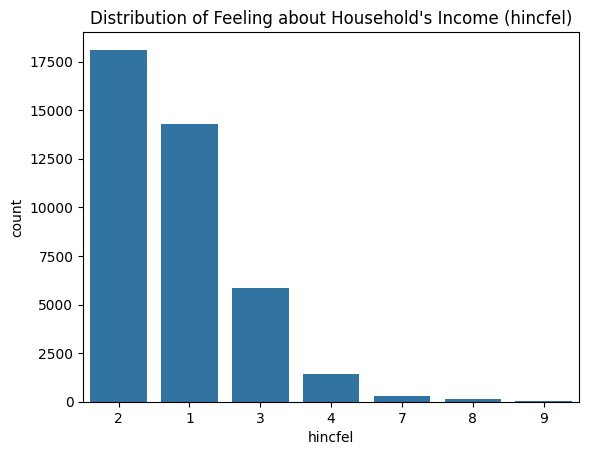

In [17]:
df['hincfel'].unique()
sns.countplot(x=df['hincfel'], order=df['hincfel'].value_counts().index)
plt.title("Distribution of Feeling about Household's Income (hincfel)")
plt.show()

In [19]:
print(df.columns.tolist())

['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'dweight', 'pspwght', 'pweight', 'anweight', 'nwspol', 'netusoft', 'netustm', 'ppltrst', 'pplfair', 'pplhlp', 'polintr', 'psppsgva', 'actrolga', 'psppipla', 'cptppola', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 'vote', 'prtvtdat', 'prtvtebe', 'prtvtchr', 'prtvtccy', 'prtvtffi', 'prtvtffr', 'prtvgde1', 'prtvgde2', 'prtvtegr', 'prtvthhu', 'prtvteis', 'prtvteie', 'prtvteit', 'prtvclt1', 'prtvclt2', 'prtvclt3', 'prtvtinl', 'prtvtcno', 'prtvtfpl', 'prtvtept', 'prtvtbrs', 'prtvtesk', 'prtvtgsi', 'prtvtges', 'prtvtdse', 'prtvthch', 'prtvtdgb', 'contplt', 'donprty', 'badge', 'sgnptit', 'pbldmna', 'bctprd', 'pstplonl', 'volunfp', 'clsprty', 'prtcleat', 'prtclebe', 'prtclbhr', 'prtclccy', 'prtclgfi', 'prtclgfr', 'prtclgde', 'prtclegr', 'prtclihu', 'prtcleis', 'prtclfie', 'prtclfit', 'prtclclt', 'prtclhnl', 'prtclcno', 'prtcljpl', 'prtclgpt', 'prtclbrs', 'prtclesk', 'prtclgsi', 'prtclhes', 'prtcldse', 'p

In [21]:
df.dtypes

name         object
essround      int64
edition     float64
proddate     object
idno          int64
             ...   
mode          int64
domain      float64
prob        float64
stratum       int64
psu           int64
Length: 640, dtype: object

In [23]:
selected_columns = ['hincfel', 'agea', 'gndr', 'cntry', 'edulvlb', 'emplrel', 'mainact',  
                    'stfeco', 'stfgov', 'gincdif', 'freehms', 'vote']   #'ppltrst', 'trstun', 'trstplt', 'lrscale', 'sclmeet'

df = df[selected_columns]  
df.head()

hincfel  agea  gndr cntry  edulvlb  emplrel  mainact  stfeco  stfgov  \
0        1    65     1    AT      322        6       66       6       4   
1        2    21     2    AT      423        1       66       2       5   
2        1    53     2    AT      610        1       66       6       5   
3        2    78     2    AT      422        1       66       4       4   
4        2    64     1    AT      322        1       66       6       7   

   gincdif  freehms  vote  
0        2        2     1  
1        1        1     1  
2        1        1     1  
3        1        2     2  
4        2        2     1

In [27]:
# print(rules_hincfel.head()) 

In [29]:
df = df.astype(str)  
te = TransactionEncoder()
df_encoded = te.fit(df.values).transform(df.values)
df_encoded = pd.DataFrame(df_encoded, columns=te.columns_)

In [31]:
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.02)

In [32]:
rules_hincfel = rules[rules['consequents'].apply(lambda x: 'hincfel' in str(x))].copy()
rules_hincfel.sort_values(by='lift', ascending=False, inplace=True)

In [35]:
if not rules_hincfel.empty:
    sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules_hincfel, palette="viridis", sizes=(20, 200))
    plt.title("Support vs Confidence (Bubble size = Lift)")
    plt.show()
else:
    print("No rules found for 'hincfel' as a consequent.")

No rules found for 'hincfel' as a consequent.


In [39]:
categorical_cols = ['cntry', 'hincfel', 'edulvlb', 'health']
filtered_df = df[categorical_cols].astype(str)
filtered_df = filtered_df.apply(lambda x: x.name + "_" + x)

In [41]:
transactions = filtered_df.values.tolist()

In [43]:
te = TransactionEncoder()
encoded_array = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(encoded_array, columns=te.columns_)

In [45]:
frequent_itemsets = apriori(encoded_df, min_support=0.03, use_colnames=True)

In [47]:
frequent_itemsets

support               itemsets
0   0.058621             (cntry_AT)
1   0.039695             (cntry_BE)
2   0.034466             (cntry_CH)
3   0.060265             (cntry_DE)
4   0.045921             (cntry_ES)
..       ...                    ...
70  0.197032  (health_2, hincfel_2)
71  0.051673  (health_2, hincfel_3)
72  0.065270  (health_3, hincfel_1)
73  0.121825  (health_3, hincfel_2)
74  0.046992  (health_3, hincfel_3)

[75 rows x 2 columns]

In [49]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [51]:
rules

antecedents  consequents  antecedent support  consequent support  \
0      (cntry_AT)  (hincfel_2)            0.058621            0.450941   
1      (cntry_GR)   (health_1)            0.068657            0.254756   
2      (cntry_GR)  (hincfel_2)            0.068657            0.450941   
3      (cntry_HU)  (hincfel_2)            0.052744            0.450941   
4      (cntry_IT)   (health_2)            0.071347            0.425316   
5      (cntry_IT)  (hincfel_2)            0.071347            0.450941   
6   (edulvlb_213)   (health_2)            0.113682            0.425316   
7   (edulvlb_213)   (health_3)            0.113682            0.247236   
8   (edulvlb_213)  (hincfel_1)            0.113682            0.356335   
9   (edulvlb_213)  (hincfel_2)            0.113682            0.450941   
10  (edulvlb_313)   (health_1)            0.121327            0.254756   
11  (edulvlb_313)   (health_2)            0.121327            0.425316   
12  (edulvlb_313)  (hincfel_1)            0.121327            0.356335   
13  (edulvlb_313)  (hincfel_2)            0.121327            0.450941   
14  (edulvlb_321)   (health_2)            0.091443            0.425316   
15  (edulvlb_321)  (hincfel_2)            0.091443            0.450941   
16  (edulvlb_322)  (hincfel_2)            0.066615            0.450941   
17  (edulvlb_323)   (health_2)            0.098939            0.425316   
18  (edulvlb_323)  (hincfel_2)            0.098939            0.450941   
19  (edulvlb_620)   (health_1)            0.081607            0.254756   
20  (edulvlb_620)   (health_2)            0.081607            0.425316   
21  (edulvlb_620)  (hincfel_1)            0.081607            0.356335   
22  (edulvlb_620)  (hincfel_2)            0.081607            0.450941   
23  (edulvlb_720)   (health_1)            0.105215            0.254756   
24  (edulvlb_720)   (health_2)            0.105215            0.425316   
25  (edulvlb_720)  (hincfel_1)            0.105215            0.356335   
26  (edulvlb_720)  (hincfel_2)            0.105215            0.450941   
27    (hincfel_1)   (health_1)            0.356335            0.254756   
28     (health_1)  (hincfel_1)            0.254756            0.356335   
29    (hincfel_2)   (health_1)            0.450941            0.254756   
30     (health_1)  (hincfel_2)            0.254756            0.450941   
31    (hincfel_1)   (health_2)            0.356335            0.425316   
32     (health_2)  (hincfel_1)            0.425316            0.356335   
33     (health_2)  (hincfel_2)            0.425316            0.450941   
34    (hincfel_2)   (health_2)            0.450941            0.425316   
35    (hincfel_3)   (health_2)            0.145981            0.425316   
36     (health_3)  (hincfel_1)            0.247236            0.356335   
37     (health_3)  (hincfel_2)            0.247236            0.450941   
38    (hincfel_2)   (health_3)            0.450941            0.247236   
39    (hincfel_3)   (health_3)            0.145981            0.247236   

     support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.031054    0.529737  1.174735  0.004619    1.167556       0.158007  
1   0.033968    0.494741  1.942014  0.016477    1.474972       0.520829  
2   0.030979    0.451215  1.000607  0.000019    1.000499       0.000651  
3   0.031851    0.603872  1.339136  0.008066    1.386062       0.267351  
4   0.032448    0.454799  1.069320  0.002104    1.054077       0.069807  
5   0.033893    0.475044  1.053449  0.001720    1.045913       0.054635  
6   0.044950    0.395400  0.929661 -0.003401    0.950519      -0.078652  
7   0.032573    0.286528  1.158926  0.004467    1.055072       0.154721  
8   0.031676    0.278642  0.781965 -0.008832    0.892296      -0.239308  
9   0.048984    0.430887  0.955528 -0.002280    0.964762      -0.049891  
10  0.042758    0.352422  1.383368  0.011849    1.150817       0.315392  
11  0.052620    0.433703  1.019718  0.001018    1.014809       0.022007  
12  0.033

In [103]:
rules_hincfel = rules[rules['consequents'].astype(str).str.contains('hincfel')]

In [55]:
rules_hincfel

antecedents  consequents  antecedent support  consequent support  \
0      (cntry_AT)  (hincfel_2)            0.058621            0.450941   
2      (cntry_GR)  (hincfel_2)            0.068657            0.450941   
3      (cntry_HU)  (hincfel_2)            0.052744            0.450941   
5      (cntry_IT)  (hincfel_2)            0.071347            0.450941   
8   (edulvlb_213)  (hincfel_1)            0.113682            0.356335   
9   (edulvlb_213)  (hincfel_2)            0.113682            0.450941   
12  (edulvlb_313)  (hincfel_1)            0.121327            0.356335   
13  (edulvlb_313)  (hincfel_2)            0.121327            0.450941   
15  (edulvlb_321)  (hincfel_2)            0.091443            0.450941   
16  (edulvlb_322)  (hincfel_2)            0.066615            0.450941   
18  (edulvlb_323)  (hincfel_2)            0.098939            0.450941   
21  (edulvlb_620)  (hincfel_1)            0.081607            0.356335   
22  (edulvlb_620)  (hincfel_2)            0.081607            0.450941   
25  (edulvlb_720)  (hincfel_1)            0.105215            0.356335   
26  (edulvlb_720)  (hincfel_2)            0.105215            0.450941   
28     (health_1)  (hincfel_1)            0.254756            0.356335   
30     (health_1)  (hincfel_2)            0.254756            0.450941   
32     (health_2)  (hincfel_1)            0.425316            0.356335   
33     (health_2)  (hincfel_2)            0.425316            0.450941   
36     (health_3)  (hincfel_1)            0.247236            0.356335   
37     (health_3)  (hincfel_2)            0.247236            0.450941   

     support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.031054    0.529737  1.174735  0.004619    1.167556       0.158007  
2   0.030979    0.451215  1.000607  0.000019    1.000499       0.000651  
3   0.031851    0.603872  1.339136  0.008066    1.386062       0.267351  
5   0.033893    0.475044  1.053449  0.001720    1.045913       0.054635  
8   0.031676    0.278642  0.781965 -0.008832    0.892296      -0.239308  
9   0.048984    0.430887  0.955528 -0.002280    0.964762      -0.049891  
12  0.033843    0.278941  0.782805 -0.009390    0.892666      -0.239988  
13  0.058049    0.478448  1.060999  0.003337    1.052741       0.065430  
15  0.046718    0.510893  1.132948  0.005482    1.122574       0.129158  
16  0.033594    0.504299  1.118325  0.003554    1.107641       0.113357  
18  0.056131    0.567329  1.258100  0.011515    1.268999       0.227677  
21  0.035487    0.434849  1.220336  0.006407    1.138925       0.196598  
22  0.035213    0.431492  0.956870 -0.001587    0.965789      -0.046783  
25  0.060091    0.571124  1.602772  0.022599    1.500819       0.420303  
26  0.037255    0.354083  0.785208 -0.010191    0.850045      -0.234135  
28  0.114603    0.449853  1.262444  0.023824    1.169988       0.278950  
30  0.103048    0.404497  0.897005 -0.011832    0.922008      -0.133503  
32  0.163014    0.383278  1.075610  0.011459    1.043686       0.122319  
33  0.197032    0.463259  1.027315  0.005239    1.022949       0.046267  
36  0.065270    0.264001  0.740878 -0.022828    0.874545      -0.317230  
37  0.121825    0.492748  1.092709  0.010336    1.082417       0.112709

In [57]:
rules_hincfel

antecedents  consequents  antecedent support  consequent support  \
0      (cntry_AT)  (hincfel_2)            0.058621            0.450941   
2      (cntry_GR)  (hincfel_2)            0.068657            0.450941   
3      (cntry_HU)  (hincfel_2)            0.052744            0.450941   
5      (cntry_IT)  (hincfel_2)            0.071347            0.450941   
8   (edulvlb_213)  (hincfel_1)            0.113682            0.356335   
9   (edulvlb_213)  (hincfel_2)            0.113682            0.450941   
12  (edulvlb_313)  (hincfel_1)            0.121327            0.356335   
13  (edulvlb_313)  (hincfel_2)            0.121327            0.450941   
15  (edulvlb_321)  (hincfel_2)            0.091443            0.450941   
16  (edulvlb_322)  (hincfel_2)            0.066615            0.450941   
18  (edulvlb_323)  (hincfel_2)            0.098939            0.450941   
21  (edulvlb_620)  (hincfel_1)            0.081607            0.356335   
22  (edulvlb_620)  (hincfel_2)            0.081607            0.450941   
25  (edulvlb_720)  (hincfel_1)            0.105215            0.356335   
26  (edulvlb_720)  (hincfel_2)            0.105215            0.450941   
28     (health_1)  (hincfel_1)            0.254756            0.356335   
30     (health_1)  (hincfel_2)            0.254756            0.450941   
32     (health_2)  (hincfel_1)            0.425316            0.356335   
33     (health_2)  (hincfel_2)            0.425316            0.450941   
36     (health_3)  (hincfel_1)            0.247236            0.356335   
37     (health_3)  (hincfel_2)            0.247236            0.450941   

     support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.031054    0.529737  1.174735  0.004619    1.167556       0.158007  
2   0.030979    0.451215  1.000607  0.000019    1.000499       0.000651  
3   0.031851    0.603872  1.339136  0.008066    1.386062       0.267351  
5   0.033893    0.475044  1.053449  0.001720    1.045913       0.054635  
8   0.031676    0.278642  0.781965 -0.008832    0.892296      -0.239308  
9   0.048984    0.430887  0.955528 -0.002280    0.964762      -0.049891  
12  0.033843    0.278941  0.782805 -0.009390    0.892666      -0.239988  
13  0.058049    0.478448  1.060999  0.003337    1.052741       0.065430  
15  0.046718    0.510893  1.132948  0.005482    1.122574       0.129158  
16  0.033594    0.504299  1.118325  0.003554    1.107641       0.113357  
18  0.056131    0.567329  1.258100  0.011515    1.268999       0.227677  
21  0.035487    0.434849  1.220336  0.006407    1.138925       0.196598  
22  0.035213    0.431492  0.956870 -0.001587    0.965789      -0.046783  
25  0.060091    0.571124  1.602772  0.022599    1.500819       0.420303  
26  0.037255    0.354083  0.785208 -0.010191    0.850045      -0.234135  
28  0.114603    0.449853  1.262444  0.023824    1.169988       0.278950  
30  0.103048    0.404497  0.897005 -0.011832    0.922008      -0.133503  
32  0.163014    0.383278  1.075610  0.011459    1.043686       0.122319  
33  0.197032    0.463259  1.027315  0.005239    1.022949       0.046267  
36  0.065270    0.264001  0.740878 -0.022828    0.874545      -0.317230  
37  0.121825    0.492748  1.092709  0.010336    1.082417       0.112709

In [59]:
print(rules_hincfel[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

      antecedents  consequents   support  confidence      lift
0      (cntry_AT)  (hincfel_2)  0.031054    0.529737  1.174735
2      (cntry_GR)  (hincfel_2)  0.030979    0.451215  1.000607
3      (cntry_HU)  (hincfel_2)  0.031851    0.603872  1.339136
5      (cntry_IT)  (hincfel_2)  0.033893    0.475044  1.053449
8   (edulvlb_213)  (hincfel_1)  0.031676    0.278642  0.781965
9   (edulvlb_213)  (hincfel_2)  0.048984    0.430887  0.955528
12  (edulvlb_313)  (hincfel_1)  0.033843    0.278941  0.782805
13  (edulvlb_313)  (hincfel_2)  0.058049    0.478448  1.060999
15  (edulvlb_321)  (hincfel_2)  0.046718    0.510893  1.132948
16  (edulvlb_322)  (hincfel_2)  0.033594    0.504299  1.118325
18  (edulvlb_323)  (hincfel_2)  0.056131    0.567329  1.258100
21  (edulvlb_620)  (hincfel_1)  0.035487    0.434849  1.220336
22  (edulvlb_620)  (hincfel_2)  0.035213    0.431492  0.956870
25  (edulvlb_720)  (hincfel_1)  0.060091    0.571124  1.602772
26  (edulvlb_720)  (hincfel_2)  0.037255    0.354083  0

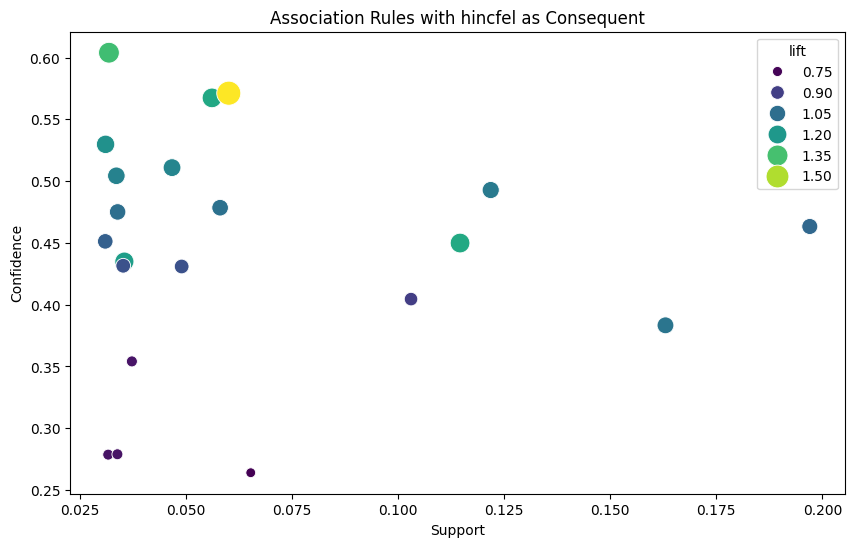

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rules_hincfel['support'], y=rules_hincfel['confidence'], 
                size=rules_hincfel['lift'], hue=rules_hincfel['lift'], palette='viridis', sizes=(50, 300))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules with hincfel as Consequent')
plt.show()

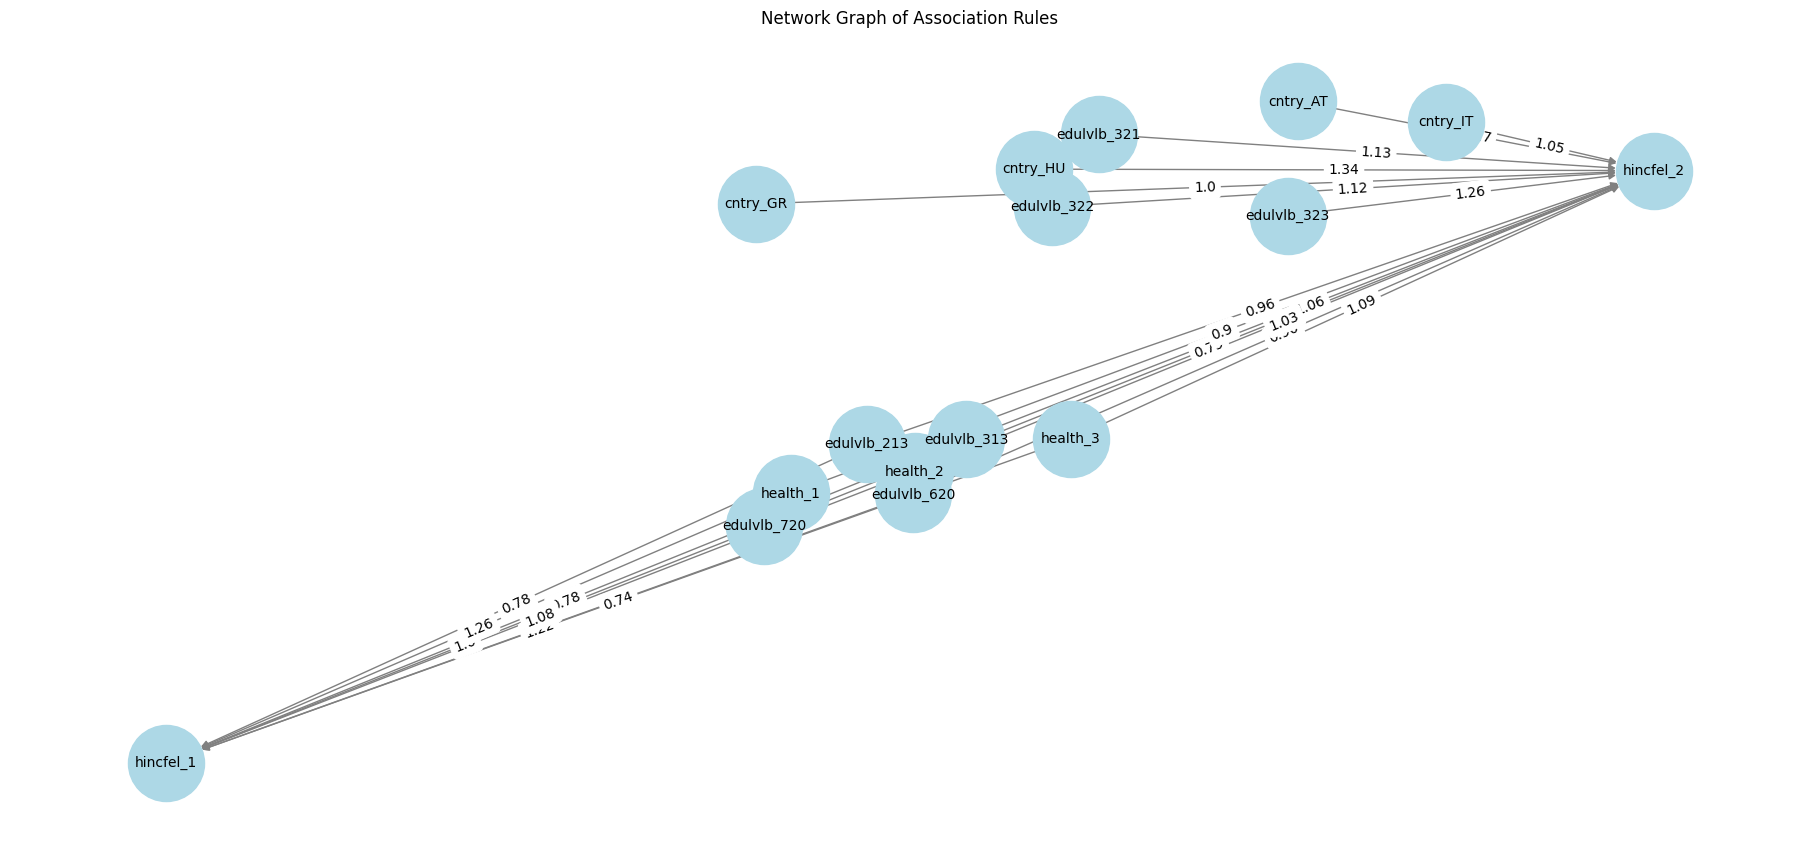

In [63]:
G = nx.DiGraph()
for _, row in rules_hincfel.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(18, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
edge_labels = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Network Graph of Association Rules")
plt.show()

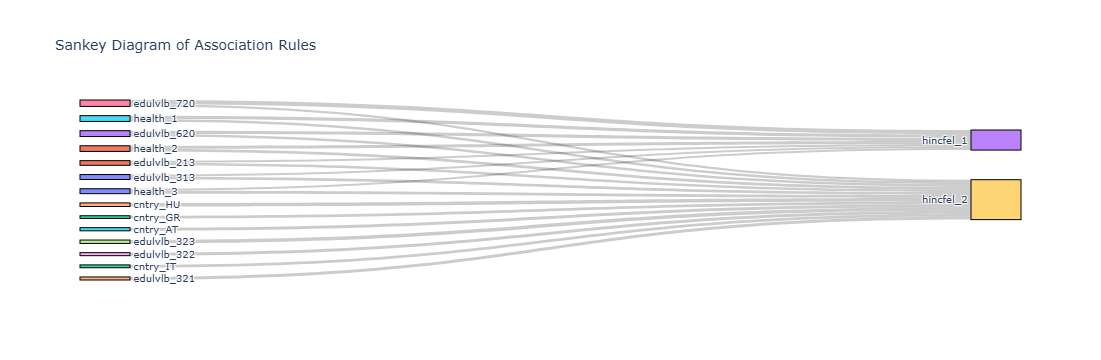

In [65]:
labels = list(set([item for sublist in rules_hincfel['antecedents'].tolist() + rules_hincfel['consequents'].tolist() for item in sublist]))
source = []
target = []
value = []
for _, row in rules_hincfel.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            source.append(labels.index(antecedent))
            target.append(labels.index(consequent))
            value.append(row['lift'])
fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=50,
        line=dict(color="black", width=1.0),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))
fig.update_layout(title_text="Sankey Diagram of Association Rules", font_size=10)
fig.show()

### Now let's work with top 10 rules for better understanding

In [107]:
rules_hincfel = rules_hincfel.nlargest(10, 'lift')
rules_hincfel

antecedents  consequents  antecedent support  consequent support  \
25  (edulvlb_720)  (hincfel_1)            0.105215            0.356335   
3      (cntry_HU)  (hincfel_2)            0.052744            0.450941   
28     (health_1)  (hincfel_1)            0.254756            0.356335   
18  (edulvlb_323)  (hincfel_2)            0.098939            0.450941   
21  (edulvlb_620)  (hincfel_1)            0.081607            0.356335   
0      (cntry_AT)  (hincfel_2)            0.058621            0.450941   
15  (edulvlb_321)  (hincfel_2)            0.091443            0.450941   
16  (edulvlb_322)  (hincfel_2)            0.066615            0.450941   
37     (health_3)  (hincfel_2)            0.247236            0.450941   
32     (health_2)  (hincfel_1)            0.425316            0.356335   

     support  confidence      lift  leverage  conviction  zhangs_metric  
25  0.060091    0.571124  1.602772  0.022599    1.500819       0.420303  
3   0.031851    0.603872  1.339136  0.008066    1.386062       0.267351  
28  0.114603    0.449853  1.262444  0.023824    1.169988       0.278950  
18  0.056131    0.567329  1.258100  0.011515    1.268999       0.227677  
21  0.035487    0.434849  1.220336  0.006407    1.138925       0.196598  
0   0.031054    0.529737  1.174735  0.004619    1.167556       0.158007  
15  0.046718    0.510893  1.132948  0.005482    1.122574       0.129158  
16  0.033594    0.504299  1.118325  0.003554    1.107641       0.113357  
37  0.121825    0.492748  1.092709  0.010336    1.082417       0.112709  
32  0.163014    0.383278  1.075610  0.011459    1.043686       0.122319

In [69]:
print(rules_hincfel[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

      antecedents  consequents   support  confidence      lift
25  (edulvlb_720)  (hincfel_1)  0.060091    0.571124  1.602772
3      (cntry_HU)  (hincfel_2)  0.031851    0.603872  1.339136
28     (health_1)  (hincfel_1)  0.114603    0.449853  1.262444
18  (edulvlb_323)  (hincfel_2)  0.056131    0.567329  1.258100
21  (edulvlb_620)  (hincfel_1)  0.035487    0.434849  1.220336
0      (cntry_AT)  (hincfel_2)  0.031054    0.529737  1.174735
15  (edulvlb_321)  (hincfel_2)  0.046718    0.510893  1.132948
16  (edulvlb_322)  (hincfel_2)  0.033594    0.504299  1.118325
37     (health_3)  (hincfel_2)  0.121825    0.492748  1.092709
32     (health_2)  (hincfel_1)  0.163014    0.383278  1.075610


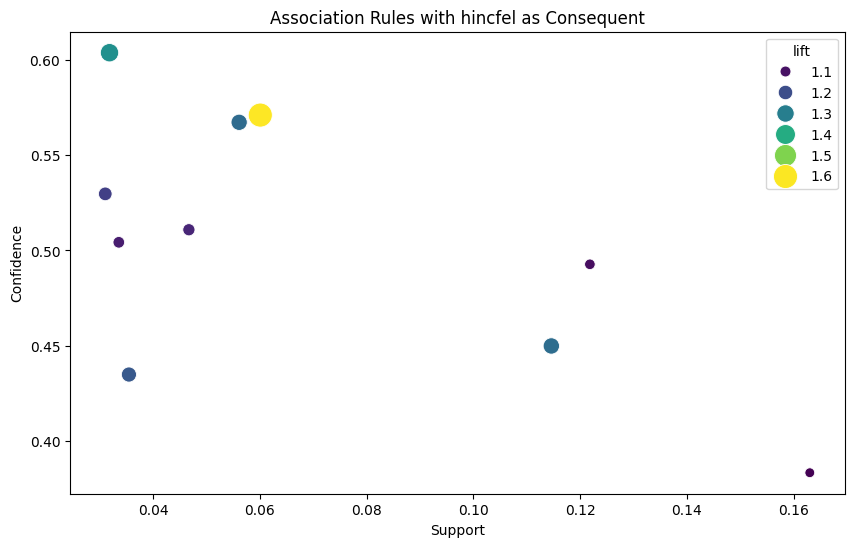

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rules_hincfel['support'], y=rules_hincfel['confidence'], 
                size=rules_hincfel['lift'], hue=rules_hincfel['lift'], palette='viridis', sizes=(50, 300))
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules with hincfel as Consequent')
plt.show()

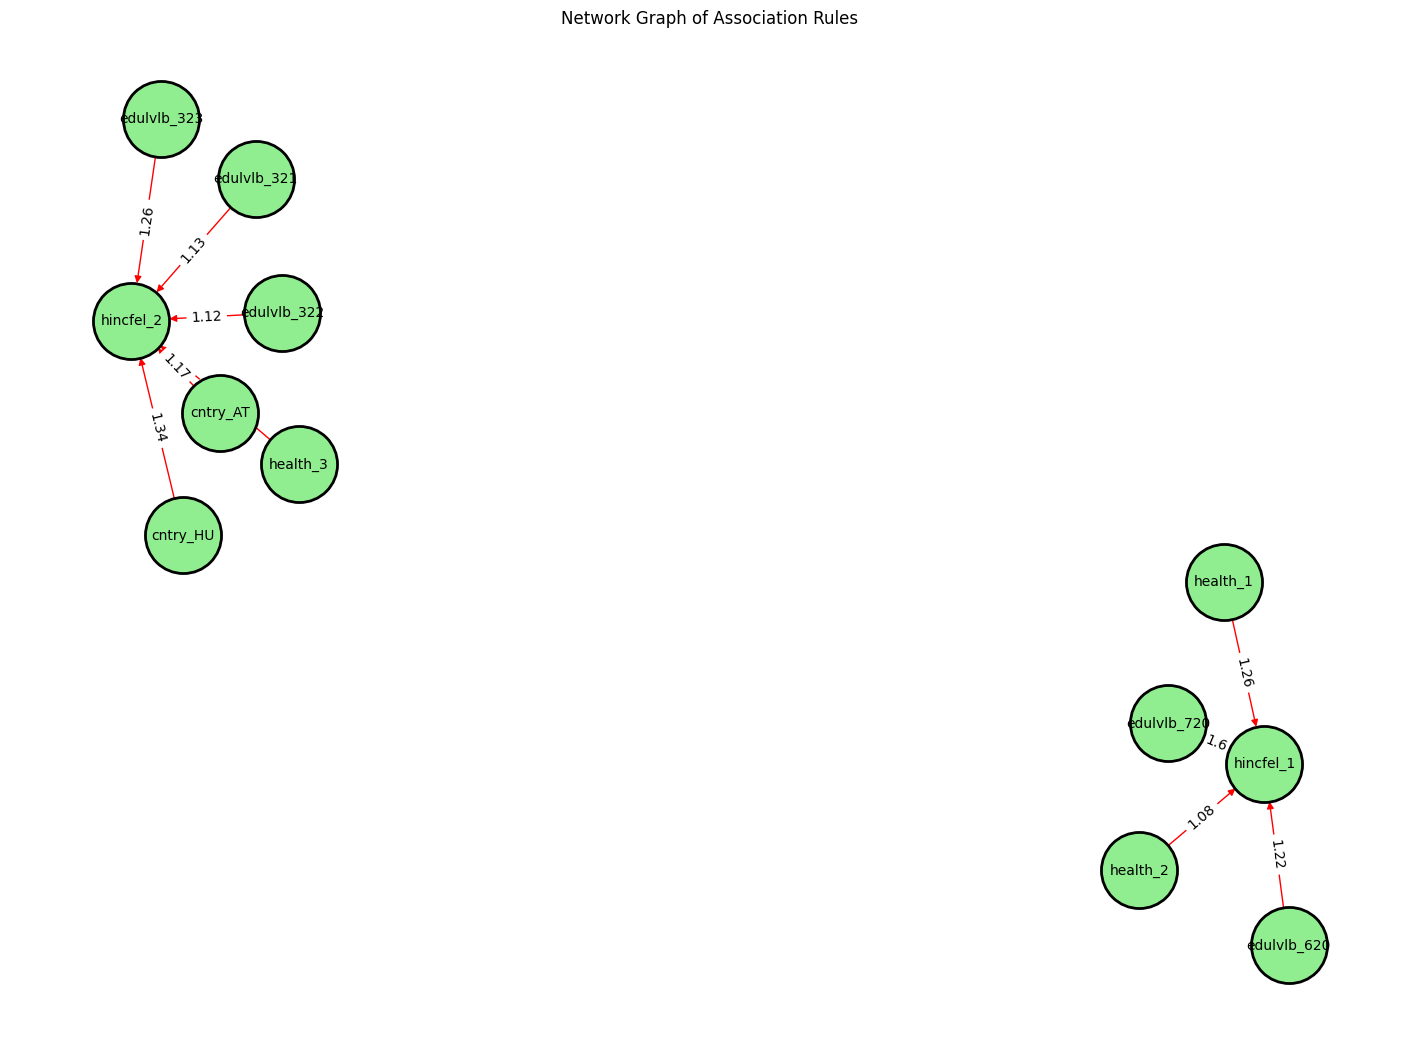

In [73]:
# Network Graph
G = nx.DiGraph()
for _, row in rules_hincfel.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='red', edgecolors='black', node_size=3000, font_size=10, linewidths=2.0)
edge_labels = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Network Graph of Association Rules")
plt.show()

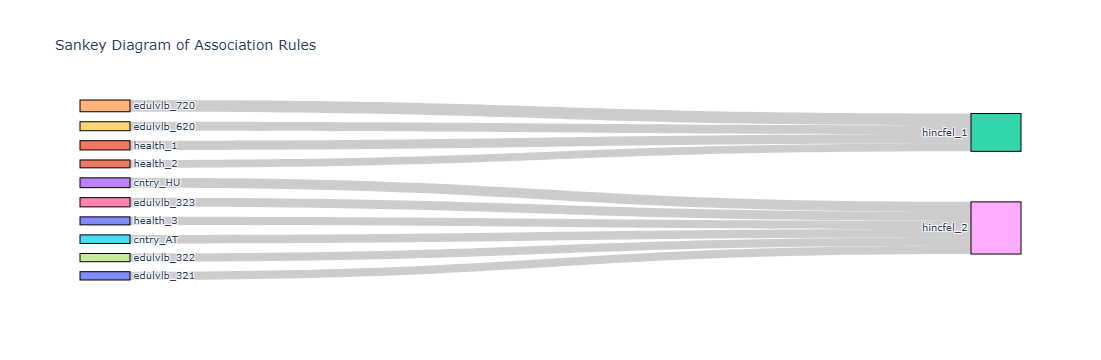

In [75]:
# Sankey Diagram
labels = list(set([item for sublist in rules_hincfel['antecedents'].tolist() + rules_hincfel['consequents'].tolist() for item in sublist]))
source = []
target = []
value = []
for _, row in rules_hincfel.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            source.append(labels.index(antecedent))
            target.append(labels.index(consequent))
            value.append(row['lift'])
fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=50,
        line=dict(color="black", width=1.0),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))
fig.update_layout(title_text="Sankey Diagram of Association Rules", font_size=10)
fig.show()

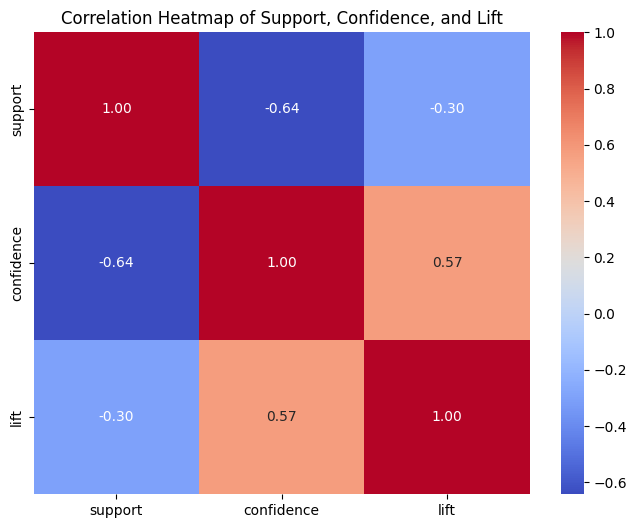

In [77]:
plt.figure(figsize=(8,6))
correlation_matrix = rules_hincfel[['support', 'confidence', 'lift']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Support, Confidence, and Lift')
plt.show()

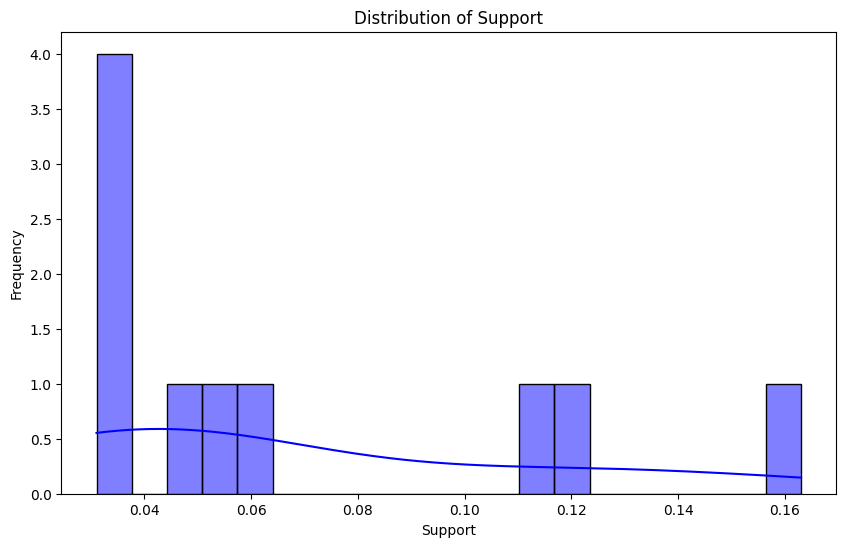

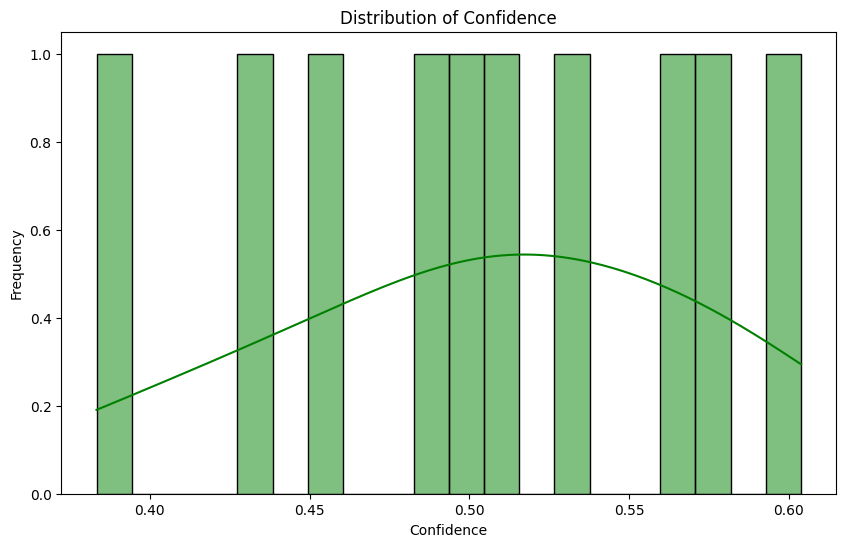

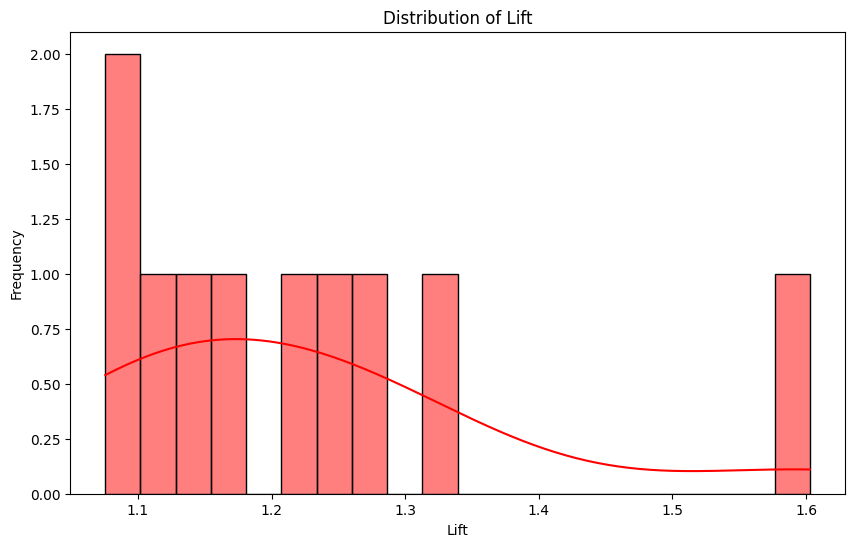

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(rules_hincfel['support'], kde=True, color='blue', bins=20)
plt.title('Distribution of Support')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(rules_hincfel['confidence'], kde=True, color='green', bins=20)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(rules_hincfel['lift'], kde=True, color='red', bins=20)
plt.title('Distribution of Lift')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()

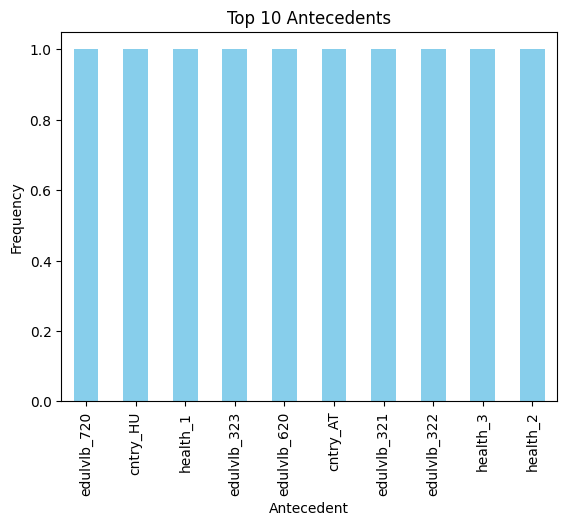

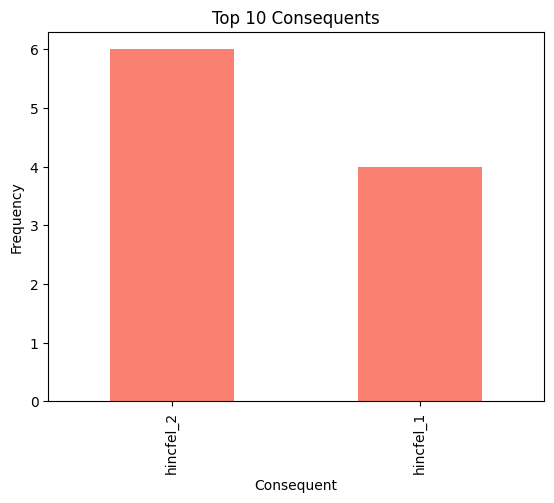

In [81]:
top_antecedents = rules_hincfel['antecedents'].explode().value_counts().head(10)
top_antecedents.plot(kind='bar', color='skyblue')
plt.title('Top 10 Antecedents')
plt.xlabel('Antecedent')
plt.ylabel('Frequency')
plt.show()
top_consequents = rules_hincfel['consequents'].explode().value_counts().head(10)
top_consequents.plot(kind='bar', color='salmon')
plt.title('Top 10 Consequents')
plt.xlabel('Consequent')
plt.ylabel('Frequency')
plt.show()

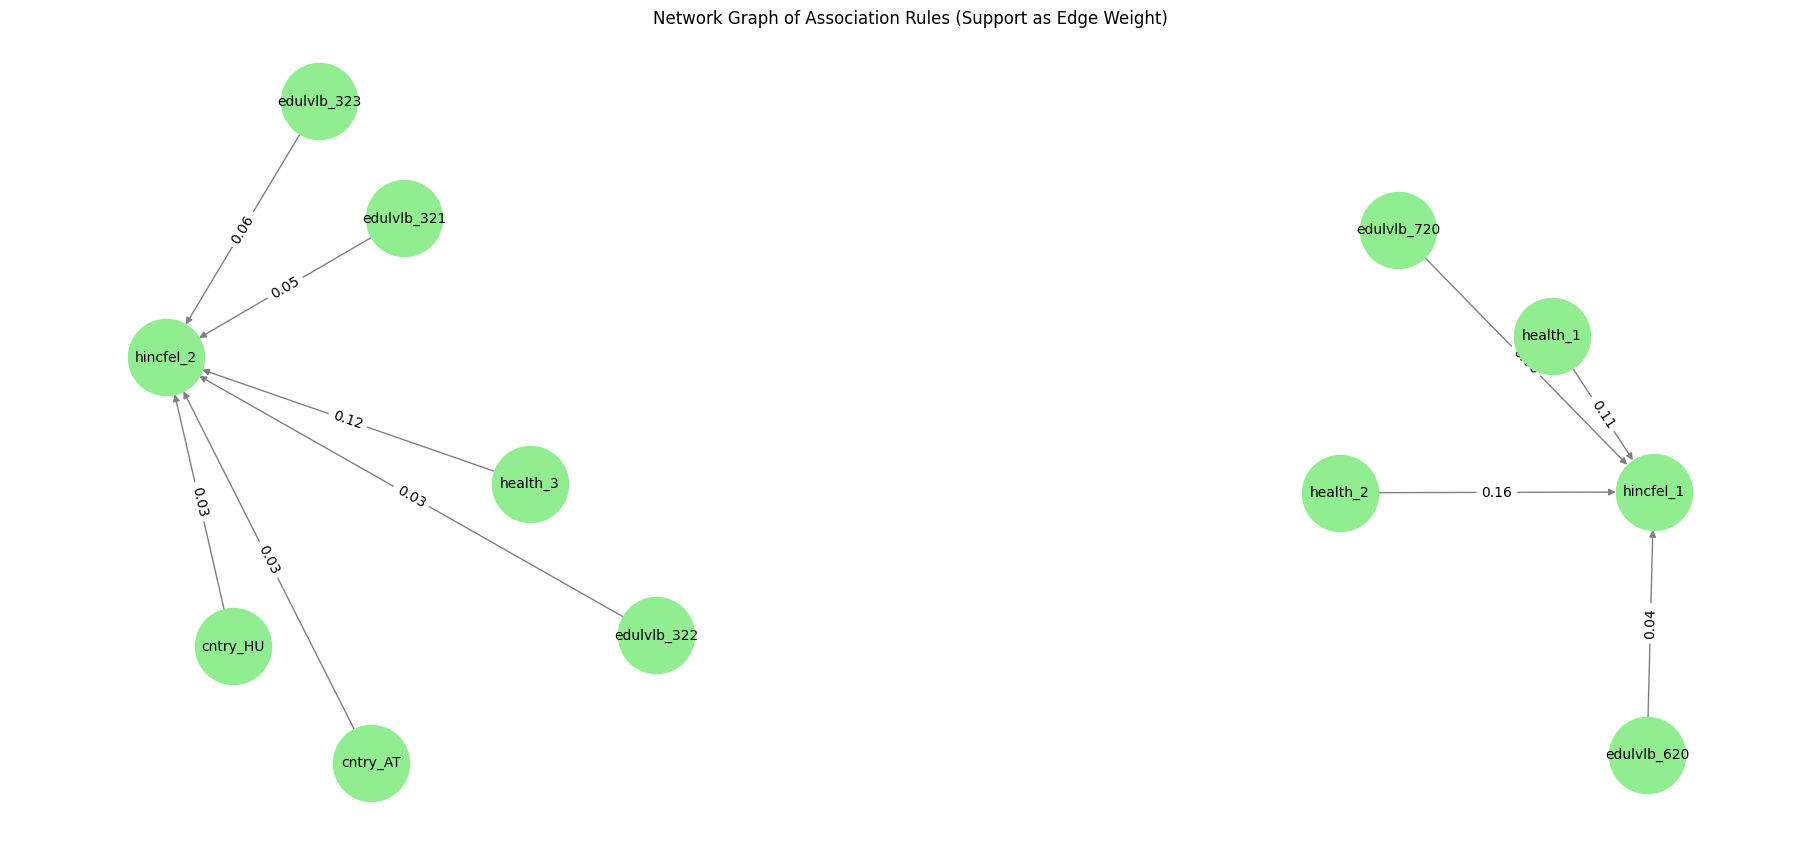

In [85]:
G = nx.DiGraph()
for _, row in rules_hincfel.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['support'])
plt.figure(figsize=(18, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=3000, font_size=10)
edge_labels = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Network Graph of Association Rules (Support as Edge Weight)")
plt.show()

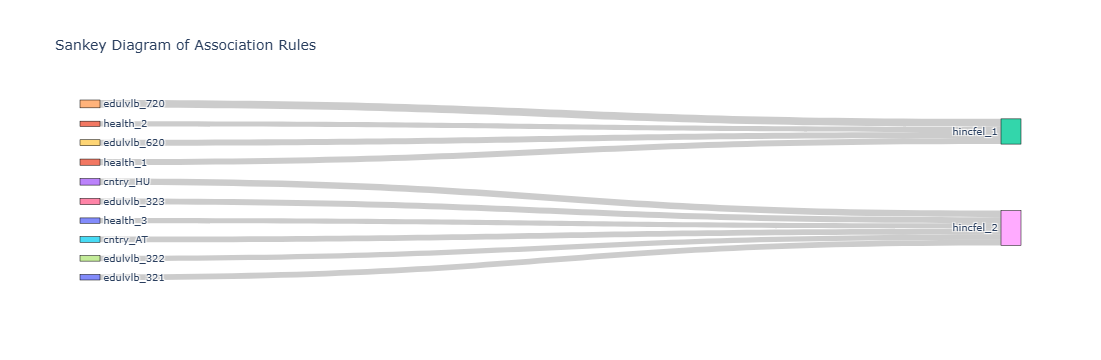

In [109]:
import plotly.graph_objects as go
labels = list(set(rules_hincfel['antecedents'].explode().tolist() + rules_hincfel['consequents'].explode().tolist()))
source = []
target = []
value = []

for _, row in rules_hincfel.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            source.append(labels.index(antecedent))
            target.append(labels.index(consequent))
            value.append(row['lift'])

# Create Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

fig.update_layout(title_text="Sankey Diagram of Association Rules", font_size=10)
fig.show()

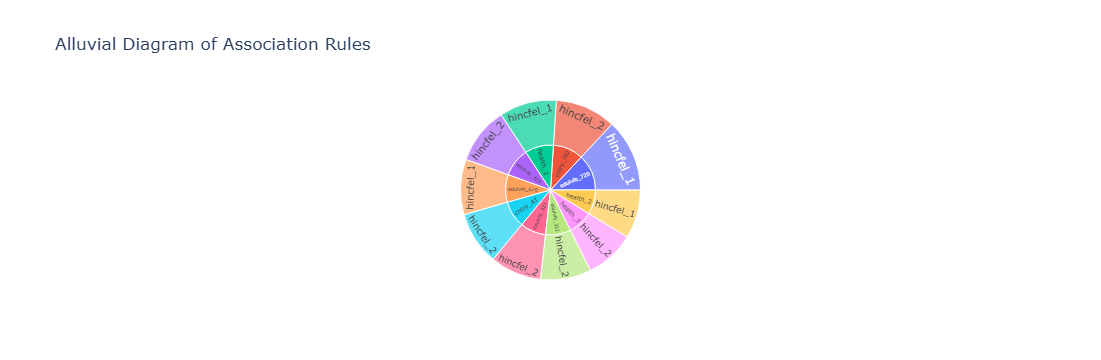

In [89]:
import plotly.express as px
alluvial_data = pd.DataFrame({
    "Antecedent": rules_hincfel['antecedents'].explode(),
    "Consequent": rules_hincfel['consequents'].explode(),
    "Lift": rules_hincfel['lift']
})
fig = px.sunburst(alluvial_data, path=['Antecedent', 'Consequent'], values='Lift', title="Alluvial Diagram of Association Rules")
fig.show()

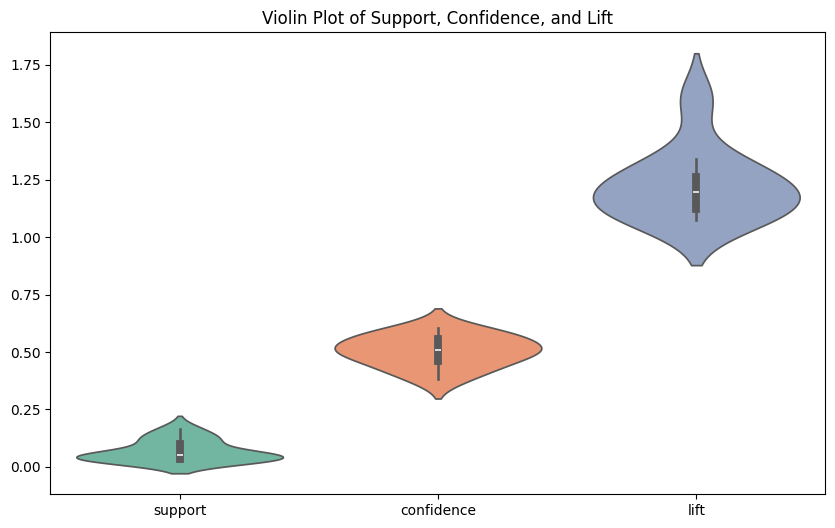

In [91]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=rules_hincfel[['support', 'confidence', 'lift']], palette="Set2")
plt.title("Violin Plot of Support, Confidence, and Lift")
plt.show()

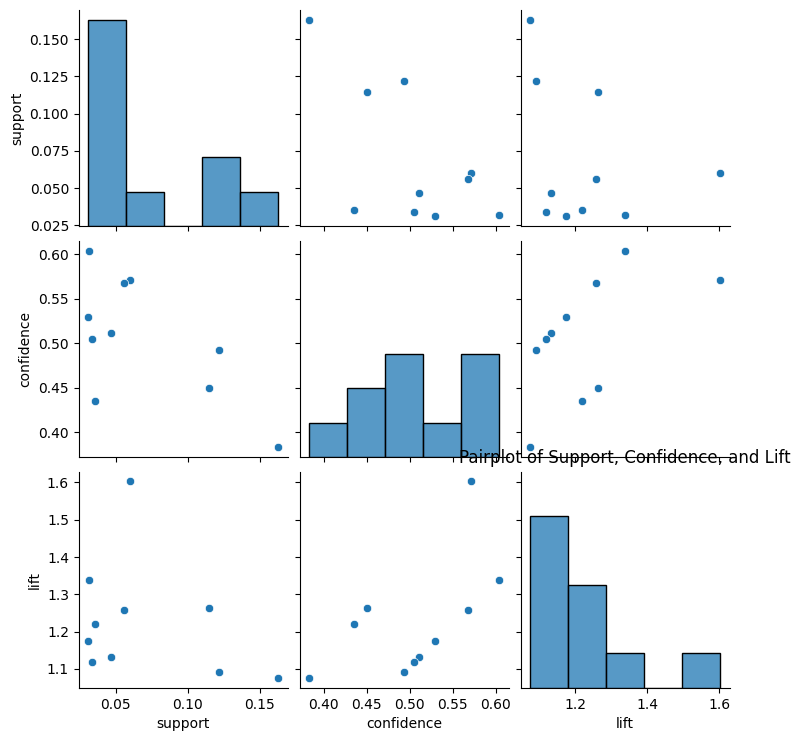

In [101]:
# plt.figure(figsize=(18, 14))
sns.pairplot(rules_hincfel[['support', 'confidence', 'lift']], plot_kws={'alpha': 1.0})
plt.title("Pairplot of Support, Confidence, and Lift")
plt.show()